https://www.advancedsportsanalytics.com/nba-raw-data

NBA Seasons 2019-2022

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Data Wrangling & Cleaning

In [5]:
# read data source
df_full = pd.read_csv('ASA All NBA Raw Data.csv')

In [6]:
df_full.shape

(121107, 81)

In [7]:
df_full.head()

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,player,player_id,starter,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,did_not_play,is_inactive,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,bpm,season,minutes,double_double,triple_double,DKP,FDP,SDP,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes
0,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,Tyrese Haliburton,halibty01,1,39:28,7,14,0.500,2,5,0.400,1,1,1.00,2,2,4,10,2,0,1,0,17,-9,0,0,0.589,0.571,0.357,0.071,4.6,9.0,6.1,31.6,2.3,0.0,6.5,15.7,137,132,1.7,2022,39.466667,1,0,43.00,41.8,44.50,1.089527,1.059122,1.127534,0.000000,14.44,36.176282,19.535428,62.0,35.0,4.0,0.0,0.0,64.741860
1,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,Buddy Hield,hieldbu01,1,35:53,8,23,0.348,5,14,0.357,0,0,0.00,0,3,3,6,3,0,2,3,21,0,0,0,0.457,0.457,0.609,0.000,0.0,14.9,5.0,22.1,3.9,0.0,8.0,28.0,94,128,-2.3,2022,35.883333,0,0,41.25,40.6,43.25,1.149559,1.131444,1.205295,0.083604,23.00,35.833974,19.350580,4.0,53.0,43.0,1.0,0.0,56.265965
2,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,Oshae Brissett,brissos01,1,35:47,10,20,0.500,5,10,0.500,3,4,0.75,3,5,8,3,1,0,0,5,28,-9,0,0,0.643,0.625,0.500,0.200,7.6,24.8,13.4,12.0,1.3,0.0,0.0,24.5,137,133,4.4,2022,35.783333,0,0,47.00,45.1,48.00,1.313461,1.260363,1.341407,0.139730,21.76,30.988194,16.733827,0.0,0.0,20.0,75.0,5.0,44.631041
3,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,Isaiah Jackson,jacksis01,1,32:01,3,4,0.750,0,0,0.000,1,2,0.50,0,3,3,0,2,1,2,5,7,3,0,0,0.717,0.750,0.000,0.500,0.0,16.7,5.6,0.0,2.9,2.5,29.1,8.6,89,128,-9.2,2022,32.016667,0,0,15.75,17.6,17.75,0.491931,0.549714,0.554399,0.156169,4.88,22.514103,14.625000,0.0,0.0,0.0,24.0,76.0,53.345389
4,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,T.J. McConnell,mccontj01,1,30:52,5,15,0.333,3,7,0.429,1,2,0.50,0,3,3,5,3,0,0,3,14,7,0,0,0.441,0.433,0.467,0.133,0.0,17.3,5.8,19.8,4.5,0.0,0.0,20.7,104,126,-1.7,2022,30.866667,0,0,32.75,34.1,35.75,1.061015,1.104752,1.158207,0.097192,15.88,25.350000,15.166667,100.0,0.0,0.0,0.0,0.0,68.220319


### Remove Duplicate Rows

In [8]:
#identify duplicate rows by boolean (True = duplicate, False = not duplicate)
df_duplicates = df_full.duplicated()

In [9]:
df_duplicates.shape

(121107,)

In [10]:
#count number of duplicate records
list(df_duplicates).count(True)

5392

In [11]:
#count number of unique records
list(df_duplicates).count(False)

115715

In [12]:
#add duplicate 'true' or 'false' as column
df_full['duplicate'] = df_duplicates

In [13]:
#filter for only duplicated records
duplicates = df_full[df_full['duplicate'] == True]

In [14]:
duplicates.shape

(5392, 82)

In [15]:
df_full.shape

(121107, 82)

In [16]:
#filter for only unique records
df_full = df_full[df_full['duplicate'] == False]

In [17]:
df_full.reset_index(inplace=True,drop=True)

In [18]:
# calculate win/lose field
winlose = []
for i in range(0,df_full.shape[0]):
    if ((df_full['Team_Score'][i]) < (df_full['Opponent_Score'][i])):
        winlose.append(0)
    else:
        winlose.append(1)

df_full['outcome'] = winlose

In [19]:
df_full.shape

(115715, 83)

In [20]:
df_full.head(1)

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,Team_ft_rate,Team_off_rtg,Inactives,Opponent_Abbrev,Opponent_Score,Opponent_pace,Opponent_efg_pct,Opponent_tov_pct,Opponent_orb_pct,Opponent_ft_rate,Opponent_off_rtg,player,player_id,starter,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,did_not_play,is_inactive,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,bpm,season,minutes,double_double,triple_double,DKP,FDP,SDP,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes,duplicate,outcome
0,202204100BRK,2022-04-10,0,A,IND,126,103.9,0.543,5.9,20.8,0.125,121.3,"Chris Duarte, Nate Hinton, Ricky Rubio, Myles ...",BRK,134,103.9,0.691,17.9,29.6,0.272,129.0,Tyrese Haliburton,halibty01,1,39:28,7,14,0.5,2,5,0.4,1,1,1.0,2,2,4,10,2,0,1,0,17,-9,0,0,0.589,0.571,0.357,0.071,4.6,9.0,6.1,31.6,2.3,0.0,6.5,15.7,137,132,1.7,2022,39.466667,1,0,43.0,41.8,44.5,1.089527,1.059122,1.127534,0.0,14.44,36.176282,19.535428,62.0,35.0,4.0,0.0,0.0,64.74186,False,0


In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115715 entries, 0 to 115714
Data columns (total 83 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   game_id                            115715 non-null  object 
 1   game_date                          115715 non-null  object 
 2   OT                                 115715 non-null  int64  
 3   H_A                                115715 non-null  object 
 4   Team_Abbrev                        115715 non-null  object 
 5   Team_Score                         115715 non-null  int64  
 6   Team_pace                          115715 non-null  float64
 7   Team_efg_pct                       115715 non-null  float64
 8   Team_tov_pct                       115715 non-null  float64
 9   Team_orb_pct                       115715 non-null  float64
 10  Team_ft_rate                       115715 non-null  float64
 11  Team_off_rtg                       1157

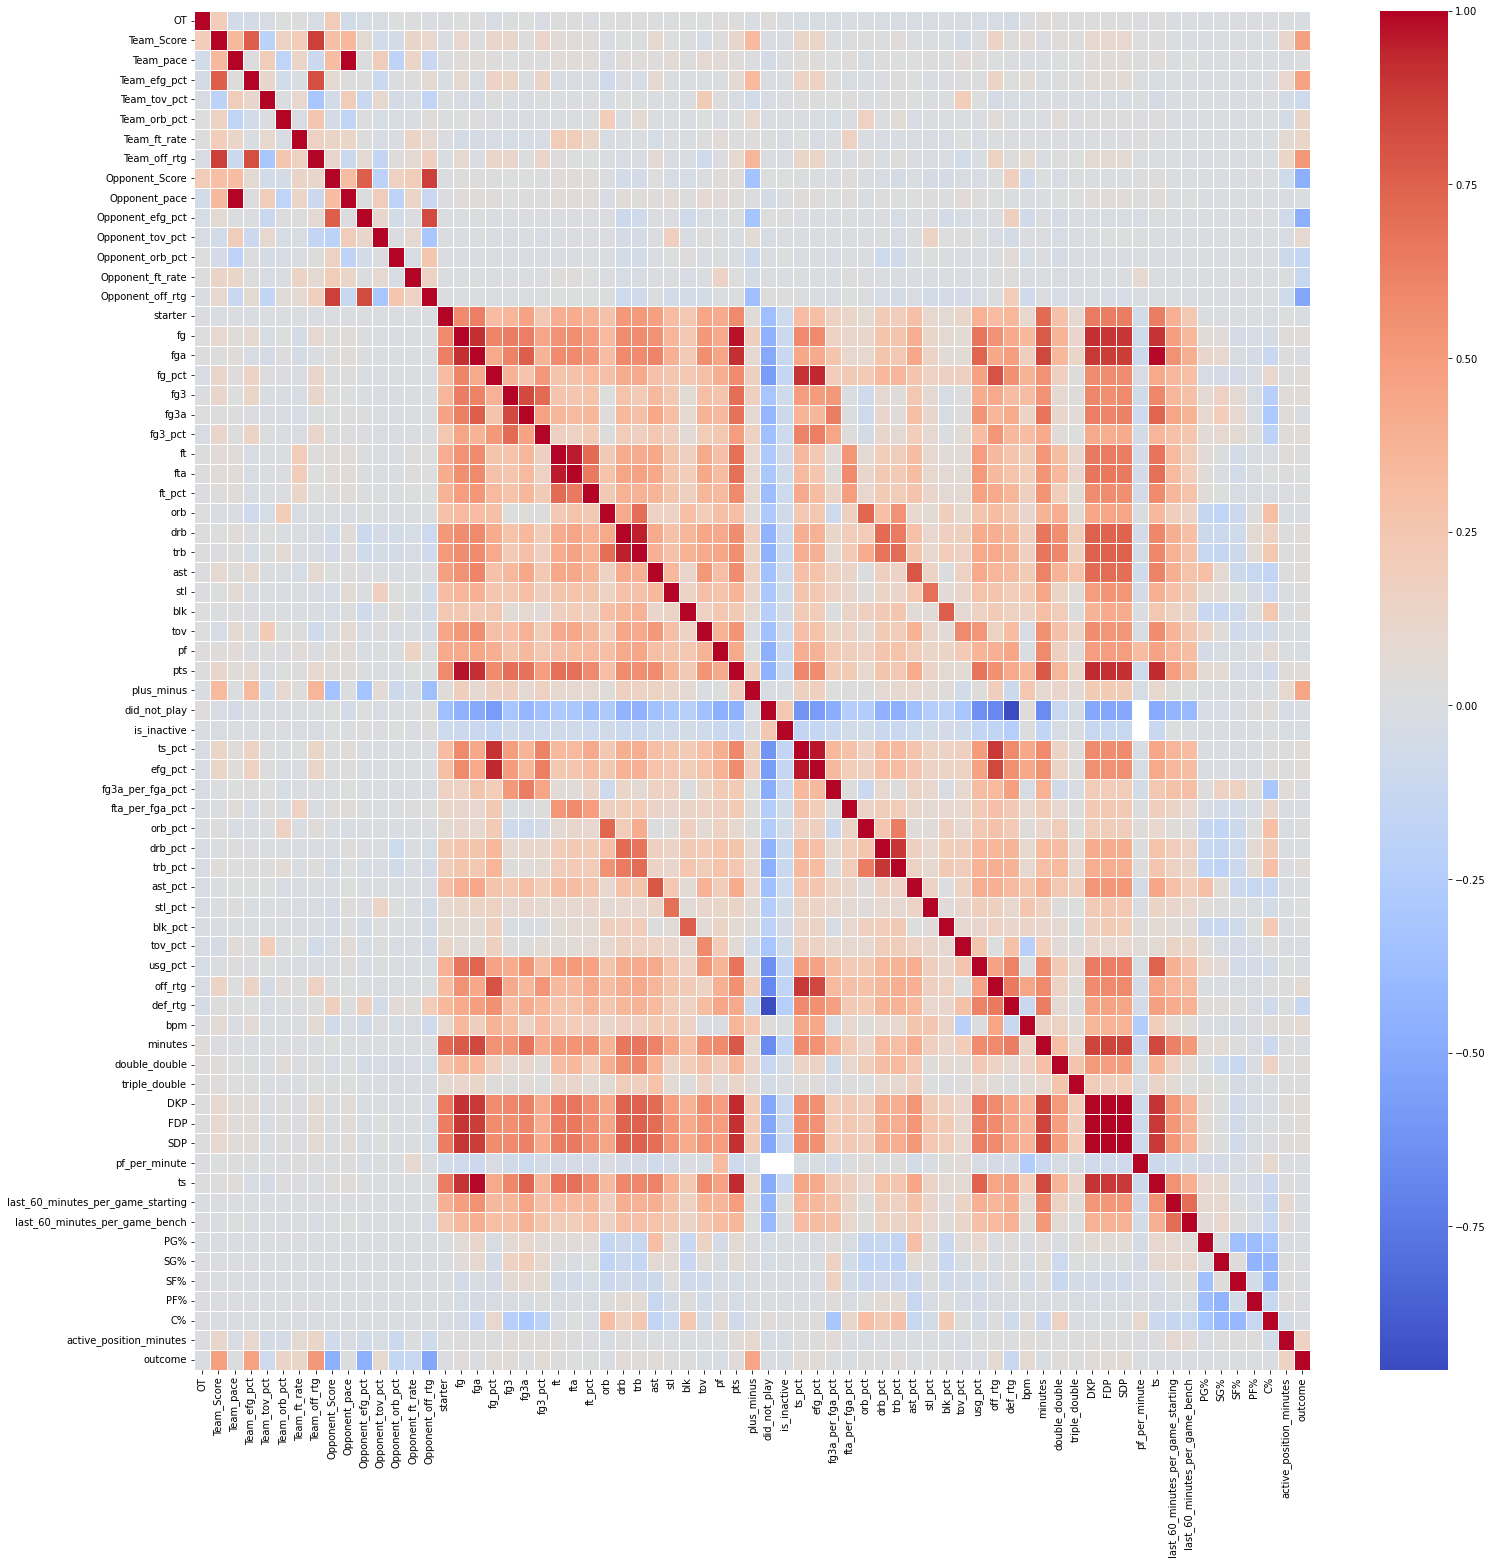

In [22]:
df_num = df_full.drop(columns=['game_id','game_date','Team_Abbrev','Inactives','Opponent_Abbrev','player','player_id',
                              'duplicate','H_A','mp','season','DKP_per_minute','FDP_per_minute','SDP_per_minute'])


# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)


# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(25,25))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)



# Show the plot
plt.show()

### Get columns relative to defensive stats and group by teams instead of individual player stats

In [23]:
# aggregate defensive stats for each game played from 2019 to 2022
df_subset = df_full.groupby(by=['game_date','Team_Abbrev','Team_Score','Opponent_Score','Opponent_Abbrev','game_id','outcome'],as_index=False).agg (sumdrb = ('drb','sum'),sumstl=('stl','sum'),sumblk=('blk','sum'))

In [24]:
df_subset.shape

(7088, 9)

In [25]:
# fill null values with 0
df_subset = df_subset.fillna(0)

In [26]:
df_subset.head(10)

,game_date,Team_Abbrev,Team_Score,Opponent_Score,Opponent_Abbrev,game_id,sumdrb,sumstl,sumblk
0,2019-10-22,LAC,112,102,LAL,201910220LAC,61,11,7
1,2019-10-22,LAL,102,112,LAC,201910220LAC,60,8,12
2,2019-10-22,NOP,122,130,TOR,201910220TOR,37,4,9
3,2019-10-22,TOR,130,122,NOP,201910220TOR,75,11,6
4,2019-10-23,BOS,93,107,PHI,201910230PHI,57,7,2
5,2019-10-23,BRK,126,127,MIN,201910230BRK,49,13,10
6,2019-10-23,CHI,125,126,CHO,201910230CHO,29,11,4
7,2019-10-23,CHO,126,125,CHI,201910230CHO,32,3,4
8,2019-10-23,CLE,85,94,ORL,201910230ORL,44,8,2
9,2019-10-23,DAL,108,100,WAS,201910230DAL,78,10,10


In [27]:
df_subset.head()

,game_date,Team_Abbrev,Team_Score,Opponent_Score,Opponent_Abbrev,game_id,sumdrb,sumstl,sumblk
0,2019-10-22,LAC,112,102,LAL,201910220LAC,61,11,7
1,2019-10-22,LAL,102,112,LAC,201910220LAC,60,8,12
2,2019-10-22,NOP,122,130,TOR,201910220TOR,37,4,9
3,2019-10-22,TOR,130,122,NOP,201910220TOR,75,11,6
4,2019-10-23,BOS,93,107,PHI,201910230PHI,57,7,2


# 2. Creating Features

### 1. What's the ratio of games won as a result of good D to games won regardless of defensive effort? 

### 2. Ratio of games won  as a result of bad D to games won regardless of defensive effort?

### **What is good/bad D?**



### We will create a feature that quantitates defensive effort

Defensive Stats
1. Defensive Rebounds (drb)
2. Steals (stl)
3. Blocks (blk)


**Logic**


1.  If 2 or more of the winner's defensive stats is greater than the loser's def stats, count as **Good D**. 

2.  If < 2 of the winner's defensive stats is greater than the loser's def stats, **Bad D**

In [28]:
df_subset.head(6)

,game_date,Team_Abbrev,Team_Score,Opponent_Score,Opponent_Abbrev,game_id,sumdrb,sumstl,sumblk
0,2019-10-22,LAC,112,102,LAL,201910220LAC,61,11,7
1,2019-10-22,LAL,102,112,LAC,201910220LAC,60,8,12
2,2019-10-22,NOP,122,130,TOR,201910220TOR,37,4,9
3,2019-10-22,TOR,130,122,NOP,201910220TOR,75,11,6
4,2019-10-23,BOS,93,107,PHI,201910230PHI,57,7,2
5,2019-10-23,BRK,126,127,MIN,201910230BRK,49,13,10


### For each game, we need to compare the defensive stats of the two teams.

### Each team's defensive stats are displayed in separate rows, but the **game_id** column can be used to match team pairs (e.g. rows 0 and 1 have the same **game_id**. 

In [29]:
# create new column that combines Opponent's Abbrev and the game id
df_subset['opponent_id'] = df_subset.apply(lambda row: row['Opponent_Abbrev'] + '_' + str(row['game_id']),axis = 1)

In [30]:
df_subset.head(2)

,game_date,Team_Abbrev,Team_Score,Opponent_Score,Opponent_Abbrev,game_id,sumdrb,sumstl,sumblk,opponent_id
0,2019-10-22,LAC,112,102,LAL,201910220LAC,61,11,7,LAL_201910220LAC
1,2019-10-22,LAL,102,112,LAC,201910220LAC,60,8,12,LAC_201910220LAC


In [31]:
# create dictionary that maps 'opponent_id' values to teams defensive stats
defense_lead_dict = dict(zip(df_subset['opponent_id'],zip(df_subset['sumdrb'],df_subset['sumstl'],df_subset['sumblk'])))

In [32]:
defense_lead_dict

{'LAL_201910220LAC': (61, 11, 7),
 'LAC_201910220LAC': (60, 8, 12),
 'TOR_201910220TOR': (37, 4, 9),
 'NOP_201910220TOR': (75, 11, 6),
 'PHI_201910230PHI': (57, 7, 2),
 'MIN_201910230BRK': (49, 13, 10),
 'CHO_201910230CHO': (29, 11, 4),
 'CHI_201910230CHO': (32, 3, 4),
 'ORL_201910230ORL': (44, 8, 2),
 'WAS_201910230DAL': (78, 10, 10),
 'POR_201910230POR': (53, 19, 7),
 'IND_201910230IND': (35, 5, 6),
 'DET_201910230IND': (32, 12, 9),
 'MIA_201910230MIA': (31, 9, 7),
 'MEM_201910230MIA': (61, 15, 10),
 'BRK_201910230BRK': (40, 9, 4),
 'SAS_201910230SAS': (34, 16, 1),
 'UTA_201910230UTA': (69, 9, 8),
 'CLE_201910230ORL': (45, 17, 5),
 'BOS_201910230PHI': (80, 12, 11),
 'SAC_201910230PHO': (35, 13, 9),
 'DEN_201910230POR': (54, 12, 6),
 'PHO_201910230PHO': (35, 5, 5),
 'NYK_201910230SAS': (41, 6, 5),
 'OKC_201910230UTA': (57, 6, 6),
 'DAL_201910230DAL': (36, 6, 3),
 'DET_201910240DET': (34, 9, 2),
 'ATL_201910240DET': (30, 6, 5),
 'LAC_201910240GSW': (27, 7, 0),
 'MIL_201910240HOU': (66,

In [33]:
final_score = [] #stores sum of def_score for each team
for i in range(0,df_subset.shape[0]):
    
    def_score = [] #empty list to store 1s if current teams defensive stat exceeds opponent's
    team_tup = (df_subset['sumdrb'][i],df_subset['sumstl'][i],df_subset['sumblk'][i]) # current team's defensive stats
    
    tupKey = df_subset['Team_Abbrev'][i] + '_' + df_subset['game_id'][i] #dictionary key to get opponents defensive stats
    opp_tup = defense_lead_dict[tupKey] #opponents defensive stats
    
    #logic to calculate team's defensive score
    if team_tup[0] > opp_tup[0]:
        def_score.append(1)
    else:
        def_score.append(0)
    if team_tup[1] > opp_tup[1]:
        def_score.append(1)
    else:
        def_score.append(0)
    if team_tup[2] > opp_tup[2]:
        def_score.append(1)
    else:
        def_score.append(0)
        
    final_score.append('Good D' if sum(def_score) >= 2 else 'Bad D') #sum values in def_score and append to final_score
    
df_subset['Defensive Effort'] = final_score

In [34]:
df_subset.head()

,game_date,Team_Abbrev,Team_Score,Opponent_Score,Opponent_Abbrev,game_id,sumdrb,sumstl,sumblk,opponent_id,Defensive Effort
0,2019-10-22,LAC,112,102,LAL,201910220LAC,61,11,7,LAL_201910220LAC,Good D
1,2019-10-22,LAL,102,112,LAC,201910220LAC,60,8,12,LAC_201910220LAC,Bad D
2,2019-10-22,NOP,122,130,TOR,201910220TOR,37,4,9,TOR_201910220TOR,Bad D
3,2019-10-22,TOR,130,122,NOP,201910220TOR,75,11,6,NOP_201910220TOR,Good D
4,2019-10-23,BOS,93,107,PHI,201910230PHI,57,7,2,PHI_201910230PHI,Bad D


# 3. Data Exploration

In [35]:
# ratio games won when defense was good to games won regardless of defense
df_subset[(df_subset['outcome'] == 1) & (df_subset['Defensive Effort'] == 'Good D')].shape[0]/df_subset[df_subset['outcome'] == 1].shape[0]

KeyError: 'outcome'

In [ ]:
# ratio games lost when defense was bad to games lost regardless of defense
df_subset[(df_subset['outcome'] == 0) & (df_subset['Defensive Effort'] == 'Bad D')].shape[0]/df_subset[df_subset['outcome'] == 0].shape[0]

In [ ]:
df_subset[df_subset['outcome'] == 1 & df_subset['Defensive Effort'] == 'Good D'].shape[0]

In [ ]:
#separate wins and losses
df_wins = df_subset[df_subset['outcome'] == 1]
df_lose = df_subset[df_subset['outcome'] == 0]

In [ ]:
#reset index
df_lose.reset_index(inplace=True,drop=True)

### 3. What is the average difference between the final score when defense wins the game? 

### 4. When defense does not win the game?

In [ ]:
(df_wins['Team_Score'].loc[true] - df_wins['Opponent_Score'].loc[true]).mean()

In [ ]:
(df_wins['Team_Score'].loc[false] - df_wins['Opponent_Score'].loc[false]).mean()

### 5. Are the means significantly different?

In [ ]:
#add boolean (true, false) field signfying good D (true) and bad D (false)
good_D = []
scoreDiff = []
for i in range(0,df_wins.shape[0]):
    if i in true:
        good_D.append('True')
        scoreDiff.append(df_wins['Team_Score'][i] - df_wins['Opponent_Score'][i]) 
    else:
        good_D.append('False')
        scoreDiff.append(df_wins['Team_Score'][i] - df_wins['Opponent_Score'][i]) 

df_wins['good_D'] = good_D
df_wins['scoreDiff'] = scoreDiff

In [ ]:
df_wins.head()

In [ ]:
from scipy.stats import ttest_ind

In [40]:
#define samples
group1 = df_wins[df_wins['good_D']=='True']
group2 = df_wins[df_wins['good_D']=='False']

#perform independent two sample t-test
ttest_ind(group1['Team_Score'], group2['Team_Score'])

NameError: name 'df_wins' is not defined

### P-Value is less than 0.05, so we reject the null hypothesis (m1 = m2) and conclude that there is sufficient evidence to say good defense and bad defense produce different scores.

### 6. What's the ratio of games lost as a result of good D to games lost regardless of defensive effort? 

### 7. Ratio of games lost as a result of bad D to games lost regardless of defensive effort?

In [ ]:
df_lose.head()

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
plt.bar(['Good Defense','Bad Defense'],[len(true),len(false)])
plt.ylabel('Games Won')
plt.title("Quality of Defense's Effect on Winning")
plt.savefig('images/defense_vs_wins.jpg')

NameError: name 'group1' is not defined

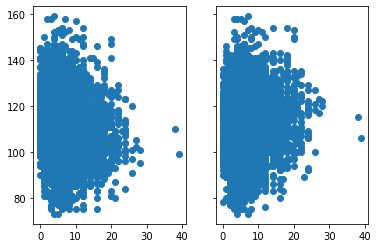

In [73]:
fig,(ax1,ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
ax1.scatter(df_subset['sumblk'],df_subset['Opponent_Score'])
ax2.scatter(df_subset['sumblk'],df_subset['Team_Score'])


In [243]:
#correlation of data
df_full_subset.corr()

,Team_Score,Opponent_Score,sumdrb,sumstl,sumblk,sumfg_pct,sum_fg3pct,sum_ftpct,sum_orb,sum_ast,sum_tov
Team_Score,1.000000,0.288873,0.156491,0.123258,0.090157,0.349464,0.379482,0.196017,0.068335,0.420906,-0.005564
Opponent_Score,0.288873,1.000000,-0.249817,-0.132965,-0.138266,-0.040662,-0.023904,0.039654,-0.032540,-0.005505,-0.040415
sumdrb,0.156491,-0.249817,1.000000,0.425689,0.465337,0.694691,0.589830,0.575957,0.460953,0.701256,0.623086
sumstl,0.123258,-0.132965,0.425689,1.000000,0.277437,0.465581,0.369166,0.392407,0.304634,0.472945,0.410703
sumblk,0.090157,-0.138266,0.465337,0.277437,1.000000,0.378769,0.300209,0.295063,0.261538,0.370402,0.322038
sumfg_pct,0.349464,-0.040662,0.694691,0.465581,0.378769,1.000000,0.766106,0.569561,0.335568,0.759995,0.527736
sum_fg3pct,0.379482,-0.023904,0.589830,0.369166,0.300209,0.766106,1.000000,0.450207,0.267111,0.680497,0.431825
sum_ftpct,0.196017,0.039654,0.575957,0.392407,0.295063,0.569561,0.450207,1.000000,0.358211,0.493606,0.441343
sum_orb,0.068335,-0.032540,0.460953,0.304634,0.261538,0.335568,0.267111,0.358211,1.000000,0.355674,0.325201
sum_ast,0.420906,-0.005505,0.701256,0.472945,0.370402,0.759995,0.680497,0.493606,0.355674,1.000000,0.506524


In [76]:
#correlation of data
df_subset.corr()

,Team_Score,Opponent_Score,sumdrb,sumstl,sumblk,outcome
Team_Score,1.000000,0.288873,0.147624,0.123237,0.100320,0.478560
Opponent_Score,0.288873,1.000000,-0.235376,-0.139026,-0.145318,-0.478560
sumdrb,0.147624,-0.235376,1.000000,0.503869,0.549812,0.290271
sumstl,0.123237,-0.139026,0.503869,1.000000,0.352034,0.191440
sumblk,0.100320,-0.145318,0.549812,0.352034,1.000000,0.197741
outcome,0.478560,-0.478560,0.290271,0.191440,0.197741,1.000000


In [235]:
df_subset.head()

,game_date,Team_Abbrev,Team_Score,Opponent_Score,sumdrb,sumstl,sumblk,outcome
0,2019-10-22,LAC,112,102,66,12,8,1
1,2019-10-22,LAL,102,112,61,8,14,0
2,2019-10-22,NOP,122,130,37,4,9,0
3,2019-10-22,TOR,130,122,82,14,6,1
4,2019-10-23,BOS,93,107,62,8,4,0


# 3. Define & Train Model

In [77]:
df_subset.head()

,game_date,Team_Abbrev,Team_Score,Opponent_Score,sumdrb,sumstl,sumblk,outcome
0,2019-10-22,LAC,112,102,66,12,8,1
1,2019-10-22,LAL,102,112,61,8,14,0
2,2019-10-22,NOP,122,130,37,4,9,0
3,2019-10-22,TOR,130,122,82,14,6,1
4,2019-10-23,BOS,93,107,62,8,4,0


In [125]:
#import ML libraries
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [137]:
#define predictor and response variables
X = df_subset.drop(columns= ['game_date','Team_Abbrev','outcome','Team_Score','Opponent_Score'],axis=1) #predictors
y= df_subset['outcome']              #response

In [164]:
X

,sumdrb,sumstl,sumblk
0,66,12,8
1,61,8,14
2,37,4,9
3,82,14,6
4,62,8,4
5,55,14,15
6,29,11,4
7,32,3,4
8,44,8,2
9,78,10,10


In [210]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,random_state=3) 

In [191]:
from collections import Counter

count = Counter(y_train)
print(count)


Counter({0: 2686, 1: 2630})


In [192]:
#define model
svc = SVC(kernel='rbf')

In [193]:
model = svc.fit(X_train, y_train)

In [194]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6399548532731377

In [195]:
from sklearn.metrics import classification_report

#Precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       858
           1       0.64      0.69      0.67       914

    accuracy                           0.64      1772
   macro avg       0.64      0.64      0.64      1772
weighted avg       0.64      0.64      0.64      1772



# 4. Model Optimization

In [196]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

C:\Users\theri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


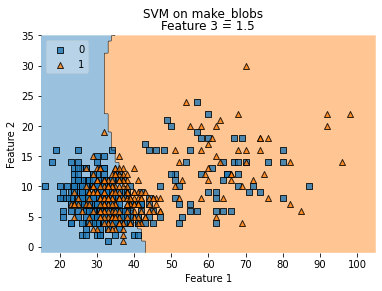

In [198]:
# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(np.array(X_train), np.array(y_train), clf=model,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm as svm_linear

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


In [215]:
def misclassification_cost(arg1, arg2):
    
    # function for calculating the missclassification cost of a classifier given test labels and predicted labels returned from the
    # trained classifier.
    
    '''
    inputs:
    arg1 = array of test labels
    arg2 = array of predicted labels
    
    returns:
    misclassification cost
    '''

    #print confusion matrix
    CM = confusion_matrix(arg1,arg2)
    print(CM)

    #define cost matrix shape
    cM = np.zeros(CM.shape)

    #assign weights to cost matrix
    if cM.shape == (3,3):
        cM[0] = [0,1,2]
        cM[1] = [1,0,1]
        cM[2] = [2,1,0]

    # for binary classification
    elif cM.shape ==(2,2):
        cM[0] = [0,1]
        cM[1] = [1,0]

    elif cM.shape == (5,5):
        cM[0] = [0,1,2,3,4]
        cM[1] = [1,0,1,2,3]
        cM[2] = [2,1,0,1,2]
        cM[3] = [3,2,1,0,1]
        cM[4] = [4,3,2,1,0]

    #calculate classification cost
    cM_matrix = np.matrix(CM * cM)
    clcost = cM_matrix.sum()/arg2.shape[0]
    
    return(clcost)

In [218]:
def classifier(arg1,arg2,arg3):
    
    '''
    arg1: X Features
    arg2: y Label
    arg3: random seed
    '''


    modelDict = {'DecisionTreeClassifier':'max_depth = %d,random_state = %d' % (4,0),
                 'RandomForestClassifier':'',
                 'svm.SVC':'kernel="rbf"', 
                 'KNeighborsClassifier':'n_neighbors = 4',
                 'LinearDiscriminantAnalysis':'solver = "lsqr",shrinkage = 0.02',
                 'QuadraticDiscriminantAnalysis':'',
                 'svm_linear.SVC':'kernel="linear"'
                }

    model_lst = list(modelDict.keys())  


    #create lists for storing model scores for cross-validation
    models = []
    accuracy = []
    mpca = []
    f1_wt = []

    #create lists for storing model scores
    accuracy2 = []
    mpca2 = []
    f1_wt2 = []
    cost2 = []
    unique2 = []
    smote = []



    for key in modelDict.keys():
        print(key)
        models.append(key)

        #define classifier with parameters including penalizing parameters
        clf = eval('%s(%s)' % (key,modelDict[key]))


        #evaluate pipeline

        # define cross-validation method for model evaluation
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)       


        #calculate cross-validated mean per class accuracy (recall macroaverage from classification report)
        results = cross_validate(clf,arg1, arg2, scoring=['recall_macro','accuracy','f1_macro','f1_weighted'], cv=cv, n_jobs=-1,error_score='raise')

        #append cross-validation results to respective lists
        accuracy.append(results['test_accuracy'].mean())
        mpca.append(results['test_recall_macro'].mean())
        f1_wt.append(results['test_f1_weighted'].mean())





        #train each model with training data and predict on test data

        #split data into train and test data (75/25 split)
        X_train, X_test, y_train, y_test = tts(arg1, arg2, random_state=arg3)


        print(np.unique(y_train))
        #train models
        model = clf.fit(X_train, y_train)  


        #predict on test data
        y_hat = model.predict(X_test)      
        print(classification_report(y_test, y_hat))

        #print confusion matrix
        CM = confusion_matrix(y_test,y_hat)
        print(CM)


        #capture classification accuracy metrics
        report_dict = classification_report(y_test,y_hat,output_dict=True)

        #mean per class accuracy
        mpca2.append(report_dict['macro avg']['recall']) #mean per class accuracy

        #return f1 score
        f1_wt2.append(report_dict['weighted avg']['f1-score'])

        #accuracy
        accuracy2.append(report_dict['accuracy'])   

        #misclassification cost
        cost2.append(misclassification_cost(y_test,y_hat))

        #unique label predictions
        unique2.append(np.unique(y_hat))



    #create and populate dataframe with cross-validation results
    df_scores = pd.DataFrame()
    df_scores['Model'] = models
    df_scores['CV Accuracy'] = accuracy
    df_scores['CV MPCA'] = mpca
    df_scores['CV F1_weighted'] = f1_wt
    
    
    df_scores2 = pd.DataFrame()
    df_scores2['SMOTE MDL'] = smote
    df_scores2['Model'] = models
    df_scores2['Accuracy'] = accuracy2
    df_scores2['MPCA'] = mpca2
    df_scores2['F1_weighted'] = f1_wt2
    df_scores2['Misclassification_Cost'] = cost2
    df_scores2['unique predictions'] = unique2




    return(df_scores2,model)

In [219]:
scores,mdl = classifier(X_train,y_train,42)

DecisionTreeClassifier
[0 1]
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       684
           1       0.61      0.73      0.66       645

    accuracy                           0.64      1329
   macro avg       0.65      0.64      0.64      1329
weighted avg       0.65      0.64      0.64      1329

[[380 304]
 [176 469]]
[[380 304]
 [176 469]]
RandomForestClassifier
[0 1]
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       684
           1       0.61      0.64      0.63       645

    accuracy                           0.63      1329
   macro avg       0.63      0.63      0.63      1329
weighted avg       0.63      0.63      0.63      1329

[[417 267]
 [229 416]]
[[417 267]
 [229 416]]
svm.SVC
[0 1]
              precision    recall  f1-score   support

           0       0.68      0.56      0.62       684
           1       0.61      0.72      0.66       645

    accuracy      

In [221]:
scores

,SMOTE MDL,Model,Accuracy,MPCA,F1_weighted,Misclassification_Cost,unique predictions
0,NaN,DecisionTreeClassifier,0.638826,0.641344,0.636486,0.361174,"[0, 1]"
1,NaN,RandomForestClassifier,0.626787,0.627305,0.626795,0.373213,"[0, 1]"
2,NaN,svm.SVC,0.641084,0.643448,0.639060,0.358916,"[0, 1]"
3,NaN,KNeighborsClassifier,0.639579,0.635356,0.631565,0.360421,"[0, 1]"
4,NaN,LinearDiscriminantAnalysis,0.585403,0.582239,0.580375,0.414597,"[0, 1]"
5,NaN,QuadraticDiscriminantAnalysis,0.586155,0.582395,0.579041,0.413845,"[0, 1]"
6,NaN,svm_linear.SVC,0.584650,0.580756,0.576991,0.415350,"[0, 1]"


# Supplemental Code

In [267]:


#create win and losses dictionaries with game_id as the keys and def stats as the values for each key
win_dict = {}
for i in range(0,df_wins.shape[0]):
    win_dict[df_wins['game_id'][i]] = df_wins[['sumdrb','sumstl','sumblk']].iloc[i]
    
lose_dict = {}
for i in range(0,df_lose.shape[0]):
    lose_dict[df_lose['game_id'][i]] = df_lose[['sumdrb','sumstl','sumblk']].iloc[i]

#assign data to variables
a = df_wins
b = win_dict
c = df_lose
d = lose_dict

def defensiveImpact(arg1,arg2,arg3):
    
    '''
    inputs
    arg1: dataframe representative of Team wins or Team losses (e.g. outcome field is 1 for wins and 0 for losses)
    arg2: win dictionary: dictionary mapping the game_id to the 3 defensive stats for Team wins
    arg3: lose dictionary: dictionary mapping the game_id to the 3 defensive stats for Team losses
    
    outputs
    output_1: list of indices reflective of records in arg1 where Teams defense exceeds Opponents defense
    output_2: list of indices reflective of records in arg1 where Teams defense do not exceed Opponents defense
    output_3: list of indices reflective of records in arg1 where Team and Opponent defense stats are all equal
    '''
    
    count = 0
    true= []
    false = []
    undec = []

    for i in range(0,arg1.shape[0]):
        if ((arg2[arg1['game_id'][i]][0] > arg3[arg1['game_id'][i]][0]) and (arg2[arg1['game_id'][i]][1] > arg3[arg1['game_id'][i]][1])):
            count = count + 1
            true.append(i)
        elif((arg2[arg1['game_id'][i]][0] > arg3[arg1['game_id'][i]][0]) and (arg2[arg1['game_id'][i]][2] > arg3[arg1['game_id'][i]][2])):
            count = count + 1
            true.append(i)
        elif((arg2[arg1['game_id'][i]][1] > arg3[arg1['game_id'][i]][1]) and (arg2[arg1['game_id'][i]][2] > arg3[arg1['game_id'][i]][2])):
            count = count + 1
            true.append(i)
        elif((arg2[arg1['game_id'][i]][0] > arg3[arg1['game_id'][i]][0]) and (arg2[arg1['game_id'][i]][1] > arg3[arg1['game_id'][i]][1]) and (arg2[arg1['game_id'][i]][2] > arg3[arg1['game_id'][i]][2])):
            count = count + 1
            true.append(i)
        elif((arg2[arg1['game_id'][i]][0] == arg3[arg1['game_id'][i]][0]) and (arg2[arg1['game_id'][i]][1] == arg3[arg1['game_id'][i]][1]) and (arg2[arg1['game_id'][i]][2] == arg3[arg1['game_id'][i]][2])):
            count = count
            undec.append(i)
        else:
            count = count
            false.append(i)

    return(true,false,undec)

output_1, output_2, output3 = defensiveImpact(a,b,d)

count = 0
true= []
false = []
undec = []

for i in range(0,df_wins.shape[0]):
    if ((win_dict[df_wins['game_id'][i]][0] > lose_dict[df_wins['game_id'][i]][0]) and (win_dict[df_wins['game_id'][i]][1] > lose_dict[df_wins['game_id'][i]][1])):
        count = count + 1
        true.append(i)
    elif((win_dict[df_wins['game_id'][i]][0] > lose_dict[df_wins['game_id'][i]][0]) and (win_dict[df_wins['game_id'][i]][2] > lose_dict[df_wins['game_id'][i]][2])):
        count = count + 1
        true.append(i)
    elif((win_dict[df_wins['game_id'][i]][1] > lose_dict[df_wins['game_id'][i]][1]) and (win_dict[df_wins['game_id'][i]][2] > lose_dict[df_wins['game_id'][i]][2])):
        count = count + 1
        true.append(i)
    elif((win_dict[df_wins['game_id'][i]][0] > lose_dict[df_wins['game_id'][i]][0]) and (win_dict[df_wins['game_id'][i]][1] > lose_dict[df_wins['game_id'][i]][1]) and (win_dict[df_wins['game_id'][i]][2] > lose_dict[df_wins['game_id'][i]][2])):
        count = count + 1
        true.append(i)
    elif((win_dict[df_wins['game_id'][i]][0] == lose_dict[df_wins['game_id'][i]][0]) and (win_dict[df_wins['game_id'][i]][1] == lose_dict[df_wins['game_id'][i]][1]) and (win_dict[df_wins['game_id'][i]][2] == lose_dict[df_wins['game_id'][i]][2])):
        count = count
        undec.append(i)
    else:
        count = count
        false.append(i)

len(output_1)/df_wins.shape[0] 

len(true)/df_wins.shape[0] 

len(false)/df_wins.shape[0] 